# Jester

Note: make sure you are not using the scaled version, but the original one.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

data = pd.read_csv("../../data/jester/jester.tsv",
                   delimiter="\t",
                   encoding="ISO-8859-1")
data.columns=["user","joke","rating"]
data.head()

,user,joke,rating
0,0,2,8.79
1,0,3,-9.66
2,0,4,-8.16
3,0,5,-7.52
4,0,6,-8.50


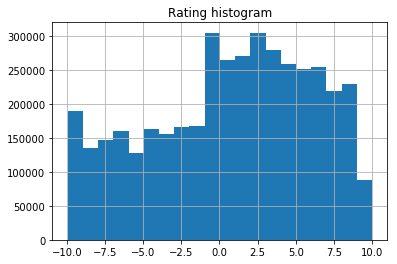

In [3]:
data["rating"].hist(bins=20).set_title("Rating histogram")

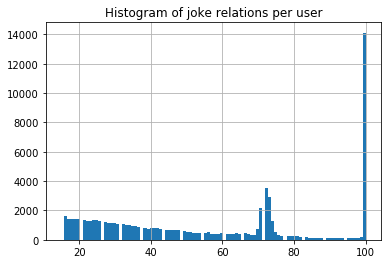

In [4]:
aux = data
aux["count"] = 1
jokes_per_user = aux.groupby("user").sum()["count"]
plot = jokes_per_user.hist(bins=100)
plot.set_title("Histogram of joke relations per user")

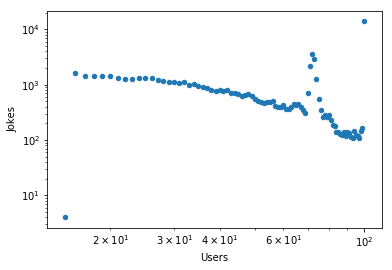

In [5]:
def to_loglog (series,x_label,y_label):
    aux_df = series.to_frame()
    aux_df.columns = ['count1']
    aux_df["count2"] = 1
    df = aux_df.groupby("count1").sum()["count2"].to_frame()
    df.reset_index(inplace=True)
    df.columns = [x_label,y_label]
    df.plot(kind='scatter',x=x_label,y=y_label,loglog=True)
    
to_loglog(jokes_per_user,x_label='Users',y_label='Jokes')

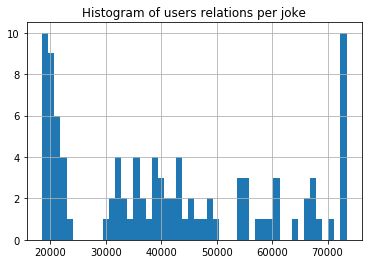

In [6]:
users_per_joke = data.groupby("joke").count()["count"]
plot = users_per_joke.hist(bins=50)
plot.set_title("Histogram of users relations per joke")

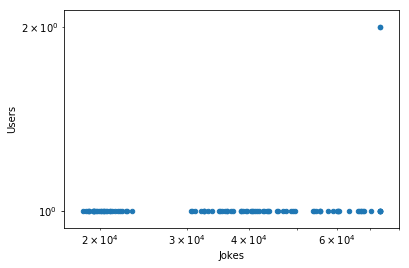

In [7]:
to_loglog(users_per_joke,x_label='Jokes',y_label='Users')

## Sparsity    


Given that we have very different datasets, like *Jester* and *Amazon Books*, it's interesting to compare sparsity between the user-item matrices. Since at most each user has an edge with each artist, the maximum possible amount of edges is $|E|_{max} = |\mathrm{Artists}| * |\mathrm{Users}|$. So we define sparsity:    

\begin{equation}
    \mathrm{Sparsity} = \frac{|E|}{|E|_{max}}
\end{equation}    

In [19]:
n_users = data["user"].unique().shape[0]
n_books = data["joke"].unique().shape[0]

sparsity = data.shape[0]/(n_users*n_books)
print("Sparsity is %.8f"%sparsity)

Sparsity is 0.56337546
